<a href="https://colab.research.google.com/github/PDGamerSG/GDSC-Image_Classification/blob/main/Vault17Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pdgamersg","key":"35378d4ad319c63c6a143638f767f63c"}'}

In [3]:
mkdir ~/.kaggle

In [4]:
cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abdulmalik1518/mobiles-dataset-2025                             Mobiles Dataset (2025)                           20KB  2025-02-18 06:50:24           7498        137  1.0              
asinow/car-price-dataset                                        Car Price Dataset                               135KB  2025-01-26 19:53:28          24517        387  1.0              
mahmoudelhemaly/students-grading-dataset                        Student Performance & Behavior Dataset          508KB  2025-02-17 17:38:46           5821        106  1.0              
asinow/diabetes-dataset                                         Diabetes Dataset

In [7]:
!kaggle datasets download -d shreelakshmigp/cedardataset

Dataset URL: https://www.kaggle.com/datasets/shreelakshmigp/cedardataset
License(s): unknown
 96% 233M/242M [00:02<00:00, 105MB/s]
100% 242M/242M [00:02<00:00, 106MB/s]


In [ ]:
! unzip cedardataset.zip

In [9]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [10]:
!ls signatures

full_forg  full_org  Readme.txt


In [11]:
!ls cedardataset/full_forg

ls: cannot access 'cedardataset/full_forg': No such file or directory


In [ ]:
!ls signatures/full_forg

In [13]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.18.0


In [14]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
dataset_path = '/content/signatures'
original_path = os.path.join(dataset_path, 'full_org')
forged_path = os.path.join(dataset_path, 'full_forg')
# Some Functions Mean,std , max,min
def extract_basic_features(img_array):
    return [
        img_array.mean(),
        img_array.std(),
        img_array.max(),
        img_array.min()
    ]

def aspect_ratio(image_path):
    img = Image.open(image_path)
    width, height = img.size
    aspect_ratio = width / height
    return aspect_ratio
features = []
images = []
labels = []
# Load original signatures
for img_file in os.listdir(original_path):
    if img_file.startswith('original_'):
        img_path = os.path.join(original_path, img_file)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)
        features.append(extract_basic_features(img_array))
        images.append(img_array)
        labels.append(0)
# Load forged signatures
for img_file in os.listdir(forged_path):
    if img_file.startswith('forgeries_'):
        img_path = os.path.join(forged_path, img_file)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)
        features.append(extract_basic_features(img_array))
        images.append(img_array)
        labels.append(1)
X = np.array(features)
images = np.array(images, dtype=object)
y = np.array(labels)

In [ ]:
# Calculate aspect ratios for original images
original_aspect_ratios = []
for img_file in os.listdir(original_path):
    if img_file.endswith(('.png')):
        img_path = os.path.join(original_path, img_file)
        #this just help to provide the path to the image in the folder
        original_aspect_ratios.append(aspect_ratio(img_path))

# Calculate aspect ratios for forged images
forged_aspect_ratios = []
for img_file in os.listdir(forged_path):
    if img_file.endswith(('.png')):
        img_path = os.path.join(forged_path, img_file)
        forged_aspect_ratios.append(aspect_ratio(img_path))

print("Aspect Ratios of Original Images:", original_aspect_ratios)
print("Aspect Ratios of Forged Images:", forged_aspect_ratios)

Label for this image is: Original


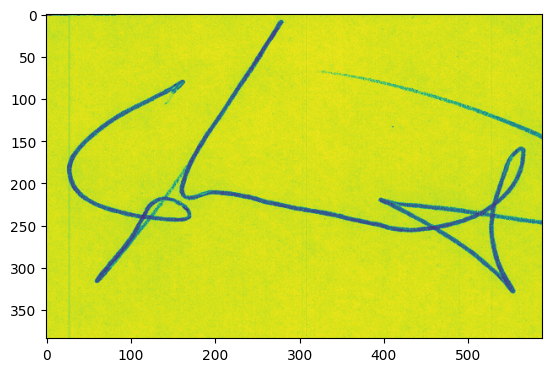

In [16]:
#sanity check
import random
import matplotlib.pyplot as plt
image_number = random.randint(0, len(images) - 1)
plt.imshow(images[image_number])
if(y[image_number] == 1):
    print("Label for this image is: Forged")
else:
    print("Label for this image is: Original")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train /255
X_test_scaled = X_test/255

In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_classifier.predict(X_test_scaled)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0


In [22]:
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[260   0]
 [  0 268]]


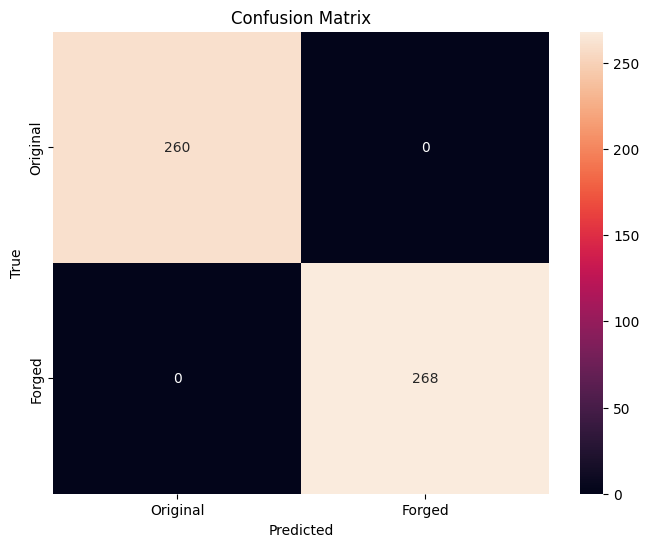

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Original', 'Forged'],
            yticklabels=['Original', 'Forged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bonus Task(Trying Hard)

In [24]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
! pip install -q kaggle

In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Dataset URL: https://www.kaggle.com/datasets/alexanderliao/artbench10
License(s): other
artbench10.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/artbench10/ArtBench-10.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Processing artwork: frank-omeara_towards-night-and-winter.jpg by frank-omeara


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Step 0/150
Step 20/150
Step 40/150
Step 60/150
Step 80/150
Step 100/150
Step 120/150
Step 140/150


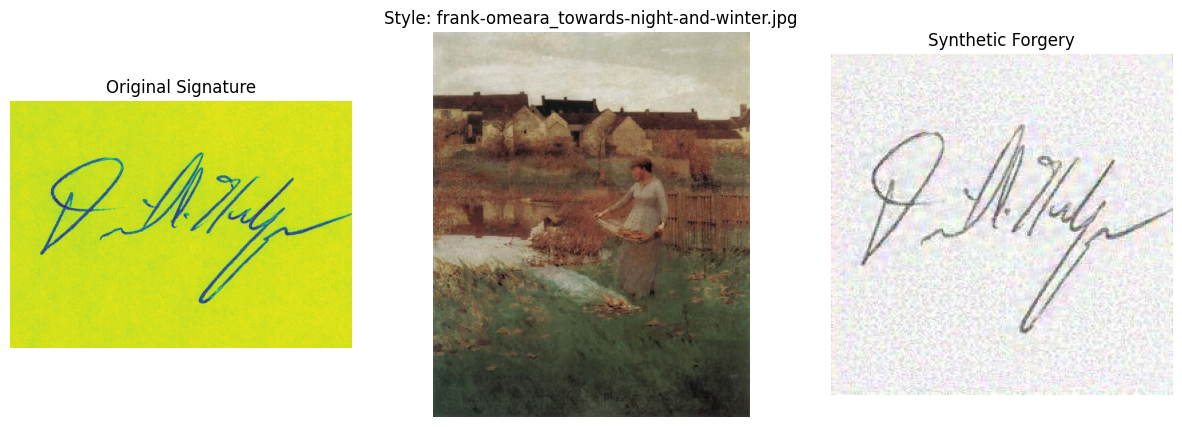

In [31]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
from io import BytesIO

!kaggle datasets download -d alexanderliao/artbench10
!unzip -q artbench10.zip -d /content/artbench10

artwork_csv = '/content/artbench10/ArtBench-10.csv'
artwork_df = pd.read_csv(artwork_csv)

original_dir = '/content/signatures/full_org'
output_dir = '/content/synthetic_forgeries'

os.makedirs(original_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

signature_path = os.path.join(original_dir, 'signature.png')
signature_img = Image.open('/content/signatures/full_org/original_10_1.png')
signature_img.save(signature_path)

def load_image_from_url(url, size=256):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.ToTensor(),
    ])
    return transform(img).unsqueeze(0)

def load_image(path, size=256):
    img = Image.open(path).convert('RGB')  # This will work with both JPG and PNG
    transform = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.ToTensor(),
    ])
    return transform(img).unsqueeze(0)

def apply_nst(content_img, style_img, steps=150):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    content_img = content_img.to(device)
    style_img = style_img.to(device)

    vgg = models.vgg19(pretrained=True).features[:20].eval().to(device)

    generated = content_img.clone().requires_grad_(True).to(device)
    optimizer = torch.optim.Adam([generated], lr=0.01)

    for step in range(steps):
        content_features = vgg(content_img)
        style_features = vgg(style_img)
        generated_features = vgg(generated)

        content_loss = torch.mean((generated_features - content_features) ** 2)

        b, c, h, w = style_features.size()
        style_flat = style_features.view(c, h*w)
        style_gram = torch.mm(style_flat, style_flat.t()) / (c * h * w)

        b, c, h, w = generated_features.size()
        gen_flat = generated_features.view(c, h*w)
        gen_gram = torch.mm(gen_flat, gen_flat.t()) / (c * h * w)

        style_loss = torch.mean((gen_gram - style_gram) ** 2)

        total_loss = content_loss + 10000 * style_loss

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        if step % 20 == 0:
            print(f"Step {step}/{steps}")

    return generated.clone().detach()

def save_tensor_as_image(tensor, path):
    image = tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
    image = np.clip(image, 0, 1)
    plt.imsave(path, image)

content_img = load_image(signature_path)

for i, row in artwork_df.head(1).iterrows():

    artwork_name = row['name']
    artist = row['artist']
    artwork_url = row['url']

    print(f"Processing artwork: {artwork_name} by {artist}")

    try:
        style_img = load_image_from_url(artwork_url)

        output_img = apply_nst(content_img, style_img)

        output_path = os.path.join(output_dir, f'synthetic_{i}_{artwork_name}.jpg')
        save_tensor_as_image(output_img, output_path)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(plt.imread(signature_path))
        plt.title("Original Signature")
        plt.axis('off')

        style_img_path = f'/content/style_{i}.jpg'
        response = requests.get(artwork_url)
        with open(style_img_path, 'wb') as f:
            f.write(response.content)

        plt.subplot(1, 3, 2)
        plt.imshow(plt.imread(style_img_path))
        plt.title(f"Style: {artwork_name}")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(plt.imread(output_path))
        plt.title("Synthetic Forgery")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {artwork_name}: {e}")
